In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline

In [78]:
pd.set_option('display.max_rows',800)
pd.set_option('display.max_columns',500)

In [91]:
train_data=pd.read_csv('ML_Artivatic_dataset/train_indessa.csv')
test_data=pd.read_csv('ML_Artivatic_dataset/test_indessa.csv')
sample=pd.read_csv('ML_Artivatic_dataset/sample_submission.csv')

In [92]:
train_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [93]:
sample.head()

,member_id,loan_status
0,11937648,0.5
1,38983318,0.5
2,27999917,0.5
3,61514932,0.5
4,59622821,0.5


In [94]:
# for results
member_id_df=pd.DataFrame(test_data['member_id'])
member_id_df.head()

,member_id
0,11937648
1,38983318
2,27999917
3,61514932
4,59622821


# Understanding Data

In [95]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [96]:
train_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [97]:
num_col=train_data.select_dtypes(include=np.number).columns
print('numeric_columns:',num_col)
print(len(num_col))
cat_col=train_data.select_dtypes(exclude=np.number).columns
print('categorical_columns:',cat_col)
print(len(cat_col))

numeric_columns: Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')
27
categorical_columns: Index(['term', 'batch_enrolled', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'initial_list_status', 'application_type', 'verification_status_joint',
       'last_week_pay'],
      dtype='object')
18


[]

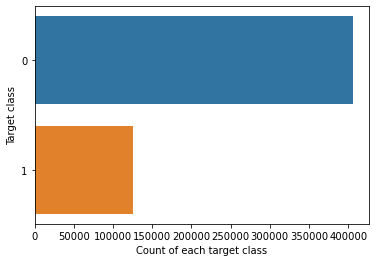

In [98]:
# check distribution of y variable
#loan status 1: Deafaulter (not paid)    0:Non defaulters (Paid)
sns.countplot(y=train_data['loan_status'],data=train_data)
plt.xlabel('Count of each target class')
plt.ylabel('Target class')
plt.plot()

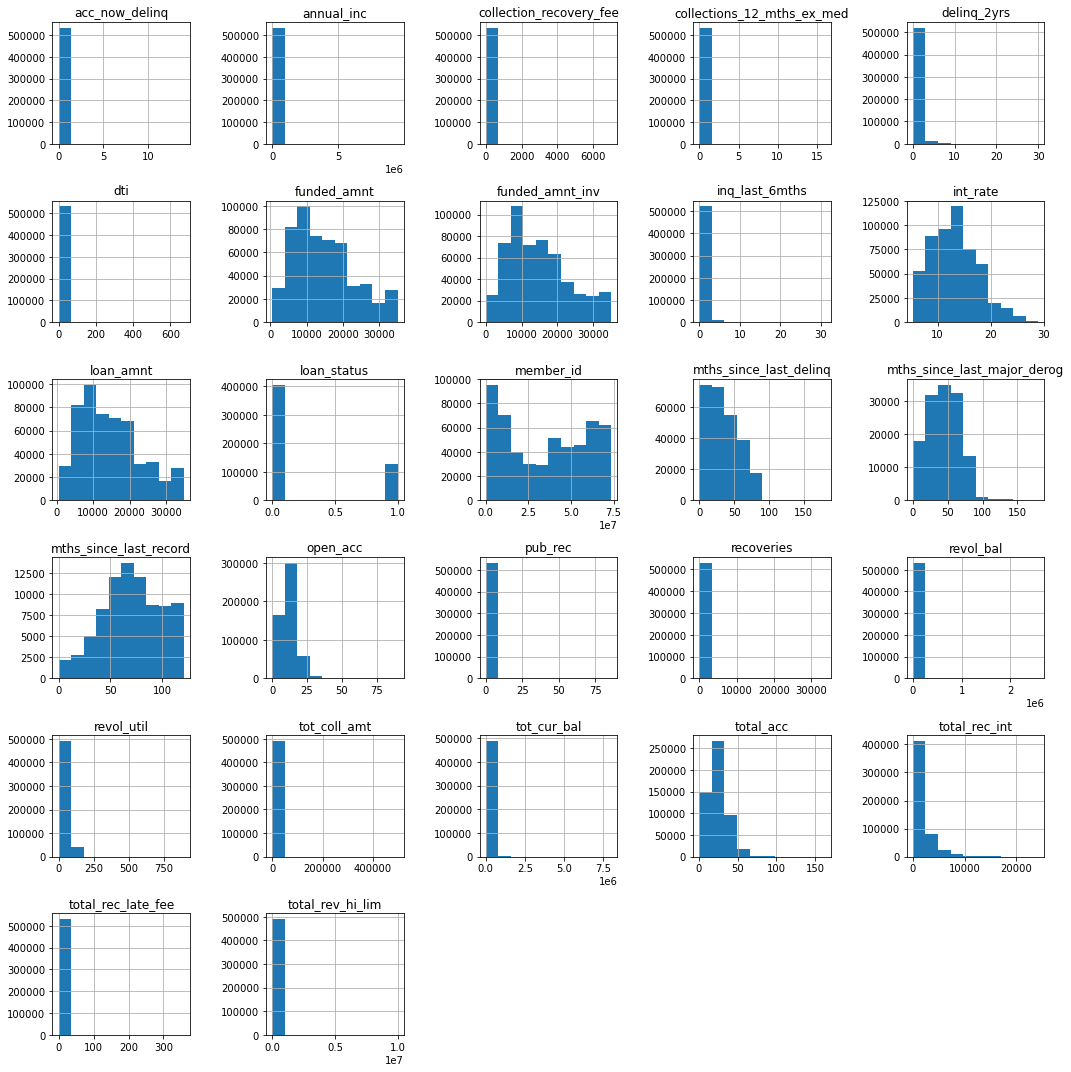

In [99]:
#check distribution of all variables
train_data.hist(figsize=(15,15))
plt.title('Feature Distribution')
plt.tight_layout()
plt.show()

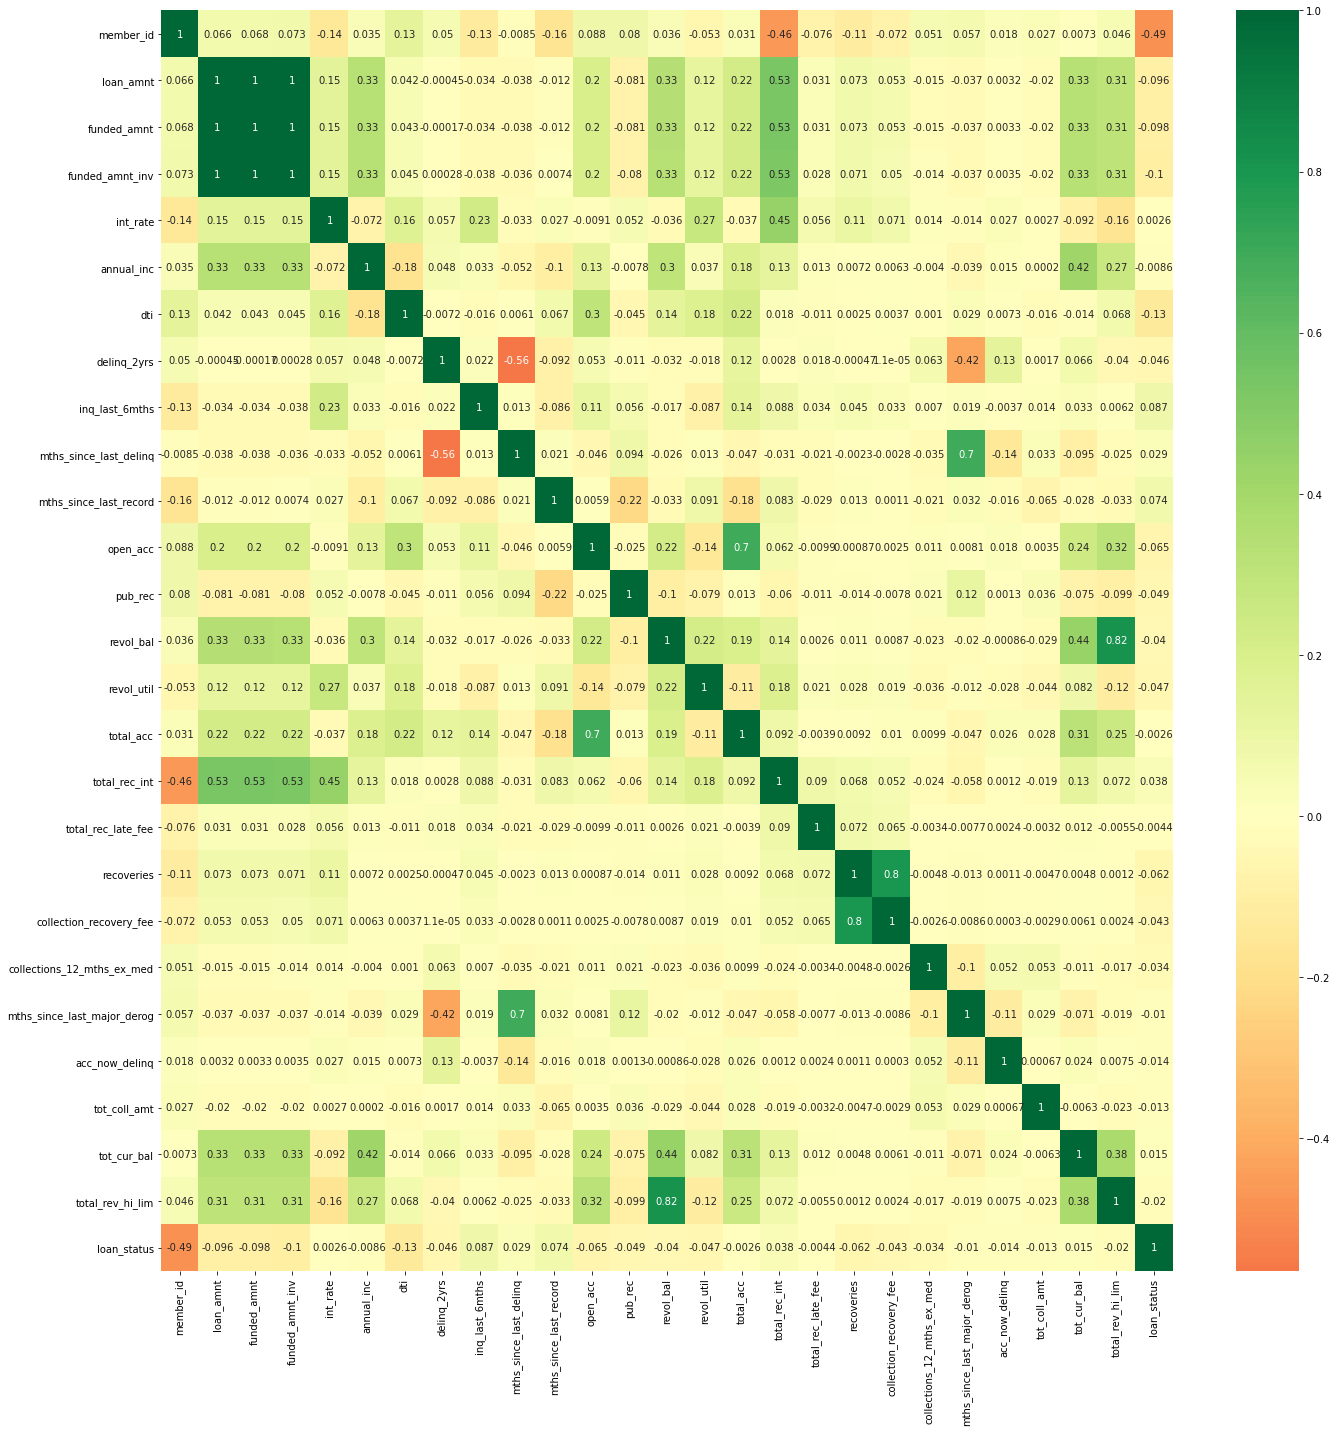

In [100]:
#check correlation
plt.figure(figsize=(20,20))
sns.heatmap(train_data[list(num_col)].corr(),annot=True,center=0,cmap="RdYlGn")
plt.tight_layout()

In [101]:
#remove columns funded_amnt,funded_amnt_inv,collection_recovery_fee
train_data=train_data.drop(["loan_amnt","funded_amnt","collection_recovery_fee"],axis=1)
test_data=test_data.drop(["loan_amnt","funded_amnt","collection_recovery_fee"],axis=1)

# Data Pre-processing

In [102]:
cat_col

Index(['term', 'batch_enrolled', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'initial_list_status', 'application_type', 'verification_status_joint',
       'last_week_pay'],
      dtype='object')

In [103]:
# use one hot encoding of column purpose
train_data=pd.get_dummies(prefix='purpose',data=train_data,columns=['purpose'])
test_data=pd.get_dummies(prefix='purpose',data=test_data,columns=['purpose'])
#train_data.head()
 ### instantiate dicts ### 
term_to_int = {'36 months': 1,'60 months': 2}
grade_to_int = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], np.arange(7, 0, -1)))   
sub_grade_sorted = {'G5': 0, 'G4': 1, 'G3': 2, 'G2': 3, 'G1': 4,
                        'F5': 5, 'F4': 6, 'F3': 7, 'F2': 8, 'F1': 9,
                        'E5': 10, 'E4': 11, 'E3': 12, 'E2': 13, 'E1': 14,
                        'D5': 15, 'D4': 16, 'D3': 17, 'D2': 18, 'D1': 19,
                        'C5': 20, 'C4': 21, 'C3': 22, 'C2': 23, 'C1': 24,
                        'B5': 25, 'B4': 26, 'B3': 27, 'B2': 28, 'B1': 29,
                        'A5': 30, 'A4': 31, 'A3': 32, 'A2': 33, 'A1': 34}    
home_to_int = {'MORTGAGE': 4, 'RENT': 3, 'OWN': 5,'ANY': 2,'OTHER': 1, 'NONE':0 }
ver_stat_to_int = {'Source Verified':2,'Verified': 1,'Not Verified': 0}

train_data.replace({'term':term_to_int,'grade':grade_to_int,'sub_grade': sub_grade_sorted,
                    'home_ownership':home_to_int,'verification_status':ver_stat_to_int}, inplace=True)
test_data.replace({'term':term_to_int,'grade':grade_to_int,'sub_grade': sub_grade_sorted,
                    'home_ownership':home_to_int,'verification_status':ver_stat_to_int}, inplace=True)

train_data['last_week_pay'].replace(to_replace="th week",value="",inplace=True,regex=True)
train_data['last_week_pay'].replace(to_replace="NA",value="",inplace=True,regex=True)
train_data['last_week_pay']=pd.to_numeric(train_data['last_week_pay'])

test_data['last_week_pay'].replace(to_replace="th week",value="",inplace=True,regex=True)
test_data['last_week_pay'].replace(to_replace="NA",value="",inplace=True,regex=True)
test_data['last_week_pay']=pd.to_numeric(train_data['last_week_pay'])

train_data['emp_length'].replace(to_replace="NA",value="0",inplace=True,regex=True)
train_data['emp_length'].replace(to_replace="\+ years",value="",inplace=True,regex=True)
train_data['emp_length'].replace(to_replace="years",value="",inplace=True,regex=True)
train_data['emp_length'].replace(to_replace="year",value="",inplace=True,regex=True)
train_data['emp_length'].replace(to_replace="< 1",value="0",inplace=True,regex=True)
train_data['emp_length']=pd.to_numeric(train_data['emp_length'],errors="coerce")

test_data['emp_length'].replace(to_replace="NA",value="0",inplace=True,regex=True)
test_data['emp_length'].replace(to_replace="\+ years",value="",inplace=True,regex=True)
test_data['emp_length'].replace(to_replace="years",value="",inplace=True,regex=True)
test_data['emp_length'].replace(to_replace="year",value="",inplace=True,regex=True)
test_data['emp_length'].replace(to_replace="< 1",value="0",inplace=True,regex=True)
test_data['emp_length']=pd.to_numeric(train_data['emp_length'],errors="coerce")

In [104]:
train_data=train_data.drop(['member_id',
                                'batch_enrolled','zip_code','addr_state','desc',
                                'initial_list_status','pymnt_plan',
                               'application_type', 'verification_status_joint',
                               'emp_title','title','mths_since_last_delinq','mths_since_last_record',
                           'mths_since_last_major_derog'],axis=1)
test_data=test_data.drop(['member_id',
                                'batch_enrolled','zip_code','addr_state','desc',
                                'initial_list_status','pymnt_plan',
                               'application_type', 'verification_status_joint',
                               'emp_title','title','mths_since_last_delinq','mths_since_last_record',
                        'mths_since_last_major_derog'],axis=1)

## Missing values imputation

In [105]:
cols = ['term', 'funded_amnt_inv','int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util','delinq_2yrs',
       'inq_last_6mths','pub_rec','emp_length','last_week_pay', 'tot_coll_amt', 
        'tot_cur_bal', 'total_rev_hi_lim',
       'total_acc', 'total_rec_int']
for col in cols:
    #print('Imputation with Median: %s' % (col))
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(test_data[col].median(), inplace=True)
    

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med']
for col in cols:
    #print('Imputation with Zero: %s' % (col))
    train_data[col].fillna(0, inplace=True)
    test_data[col].fillna(0, inplace=True)
    

    

In [106]:
#train_data_pre['loan_to_income']=np.log(train_data_pre['annual_inc']/(train_data_pre['funded_amnt_inv']))

## Feature transformation and Addition of new features

In [107]:
train_data['total_rec'] = train_data['total_rec_int'] + train_data['total_rec_late_fee']
test_data['total_rec'] = test_data['total_rec_int'] + test_data['total_rec_late_fee']
train_data['emi'] = np.sqrt(train_data['funded_amnt_inv']* train_data['int_rate'])
test_data['emi'] = np.sqrt(test_data['funded_amnt_inv']* test_data['int_rate'])
train_data['annual_inc']=np.log10(train_data['annual_inc']+10)
test_data['annual_inc']=np.log10(test_data['annual_inc']+10)
train_data['dti']=np.log10(train_data['dti']+10)
test_data['dti']=np.log10(test_data['dti']+10)
train_data['revol_bal']=np.log10(train_data['revol_bal']+10)
test_data['revol_bal']=np.log10(test_data['revol_bal']+10)
# credit_line_ratio 
train_data['credit_line_ratio']=train_data['open_acc']/train_data['total_acc']
test_data['credit_line_ratio']=test_data['open_acc']/test_data['total_acc']

train_data=train_data.drop(['open_acc','total_acc'],axis=1)
test_data=test_data.drop(['open_acc','total_acc'],axis=1)

In [108]:
test_data.shape

(354951, 41)

# Building Model

In [109]:
member_id_df.shape

(354951, 1)

# Logistic Regression

In [112]:
X=train_data.drop(['loan_status'],axis=1)
y=train_data['loan_status']
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=33)
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_val_sc=sc.transform(X_val)
test_data_sc=sc.transform(test_data)
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train_sc,y_train)
y_pred=lr.predict(X_val_sc)
print('accuracy score:',accuracy_score(y_val,y_pred))
print('confusion_matrix:\n',confusion_matrix(y_val,y_pred))
print('Classification report:\n',classification_report(y_val,y_pred))

accuracy score: 0.7830016452928846
confusion_matrix:
 [[95586  6092]
 [22792  8637]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87    101678
           1       0.59      0.27      0.37     31429

    accuracy                           0.78    133107
   macro avg       0.70      0.61      0.62    133107
weighted avg       0.76      0.78      0.75    133107



# Handle Class Imbalance

In [113]:
ros=RandomOverSampler(random_state=100)
X=train_data.drop(['loan_status'],axis=1)
y=train_data['loan_status']
X_ros,y_ros=ros.fit_sample(X,y)
# train test split
X_train,X_val,y_train,y_val=train_test_split(X_ros,y_ros,test_size=0.3,random_state=500)
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_val_sc=sc.transform(X_val)
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train_sc,y_train)
y_pred=lr.predict(X_val_sc)
y_pred_prob=lr.predict_proba(X_val_sc)
lr_auc=roc_auc_score(y_val, y_pred_prob[:,1])
print('accuracy score:',accuracy_score(y_val,y_pred))
#print('auc:',roc_auc_score(y_val,y_pred_prob[:,1]))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('confusion_matrix:\n',confusion_matrix(y_val,y_pred))
print('Classification report:\n',classification_report(y_val,y_pred))

accuracy score: 0.7172703833809503
Logistic: ROC AUC=0.778
confusion_matrix:
 [[88811 33113]
 [35862 86175]]
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72    121924
           1       0.72      0.71      0.71    122037

    accuracy                           0.72    243961
   macro avg       0.72      0.72      0.72    243961
weighted avg       0.72      0.72      0.72    243961



# Neural Network

In [114]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(50, 2), random_state=1)
mlp.fit(X_train_sc, y_train)
y_pred=mlp.predict(X_val_sc)
y_pred_prob=mlp.predict_proba(X_val_sc)
nn_auc=roc_auc_score(y_val, y_pred_prob[:,1])
print('accuracy score:',accuracy_score(y_val,y_pred))
print('Neural Network: ROC AUC=%.3f' % (nn_auc))
print('confusion_matrix:\n',confusion_matrix(y_val,y_pred))
print('Classification report:\n',classification_report(y_val,y_pred))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy score: 0.8391054307860683
Neural Network: ROC AUC=0.913
confusion_matrix:
 [[106737  15187]
 [ 24065  97972]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.84    121924
           1       0.87      0.80      0.83    122037

    accuracy                           0.84    243961
   macro avg       0.84      0.84      0.84    243961
weighted avg       0.84      0.84      0.84    243961



# ROC curve

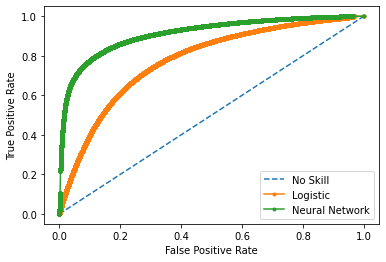

In [115]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

lr_probs = lr.predict_proba(X_val_sc)
nn_probs= mlp.predict_proba(X_val_sc)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val))]

# keep probabilities for the positive outcome only
lr_prob = lr_probs[:, 1]
nn_prob = nn_probs[:,1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_prob)
nn_fpr, nn_tpr, _ = roc_curve(y_val, nn_prob)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(nn_fpr, nn_tpr, marker='.', label='Neural Network')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [116]:
# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, lr_prob)
nn_auc = roc_auc_score(y_val, nn_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Neural Network: ROC AUC=%.3f' % (nn_auc))


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.778
Neural Network: ROC AUC=0.913


In [117]:
# test results

In [118]:
member_id_df.head()

,member_id
0,11937648
1,38983318
2,27999917
3,61514932
4,59622821


In [121]:
member_id_df.shape

(354951, 1)

In [122]:
test_data_sc.shape

(354951, 41)

In [126]:
member_id_df['loan_default_lr']=lr.predict_proba(test_data_sc)[:,1]

In [127]:
member_id_df['loan_default_nn']=mlp.predict_proba(test_data_sc)[:,1]

In [134]:
member_id_df

,member_id,loan_default_lr,loan_default_nn
0,11937648,0.446114,0.999989
1,38983318,0.418191,0.999974
2,27999917,0.240237,0.999851
3,61514932,0.535129,0.122259
4,59622821,0.770841,0.702704
...,...,...,...
354946,19145105,0.700052,0.905308
354947,46304777,0.454671,0.328581
354948,903745,0.248685,0.987976
354949,53032475,0.314736,0.943384
